In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

In [2]:
# !pip install category_encoders

In [56]:
#Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Feature Selection
from scipy import stats
import category_encoders as ce
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



#Model Building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from scipy.stats import boxcox
from scipy.special import inv_boxcox


In [4]:
df = pd.read_csv("https://open-data.s3.filebase.com/insurance.csv")    #Python

# Exploratory Data Analysis

(and some feature engineering)

In [5]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [6]:
pd.set_option('display.precision', 3)
df.describe()

age       bmi  children    charges
count  1338.000  1338.000  1338.000   1338.000
mean     39.207    30.663     1.095  13270.422
std      14.050     6.098     1.205  12110.011
min      18.000    15.960     0.000   1121.874
25%      27.000    26.296     0.000   4740.287
50%      39.000    30.400     1.000   9382.033
75%      51.000    34.694     2.000  16639.913
max      64.000    53.130     5.000  63770.428

In [7]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Scatter Plot Matrix

<Figure size 1500x1500 with 0 Axes>

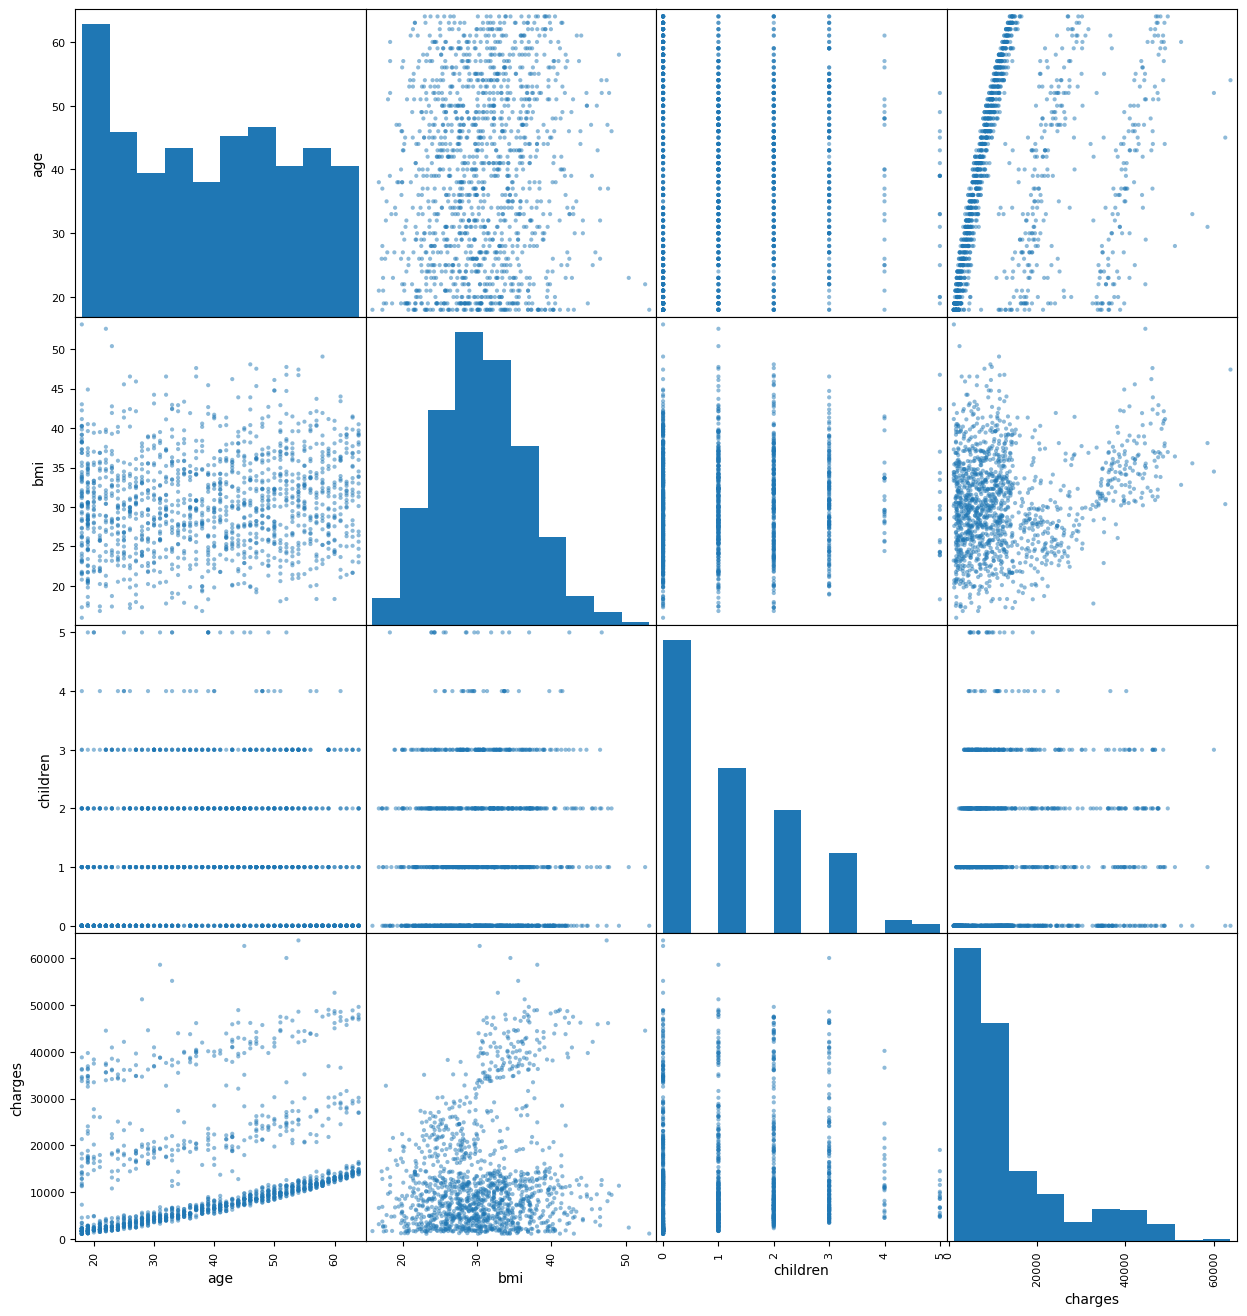

In [8]:
# Scatterplot Matrix
plt.figure(figsize=(15,15))
scatter_matrix(df,figsize=(15,16))
plt.show()

From the initial YData Profiling Report, we know: 
1. We do not have missing values, therefore, we do not need to account for the missing values problem
2. There is one duplicate row that we need to deal with. 
3. There is high correlation between age and charges
4. There is a very high correlation between being a smoker and charges

### Density plots of numerical features

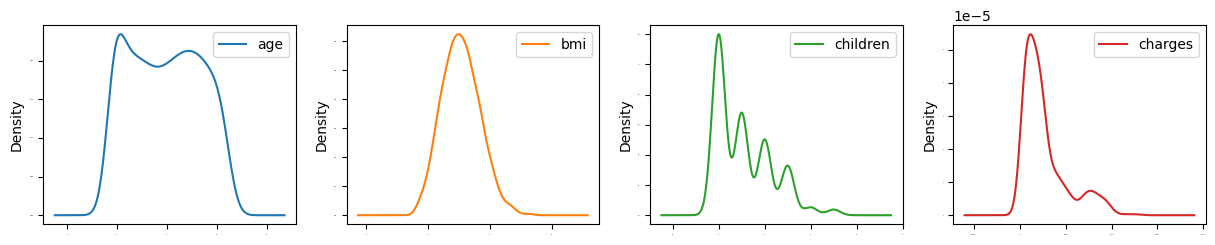

In [9]:
df.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

From the density plot:
1. We can see that both age and charges have an unusual distribution with two peaks. Therefore, we will try to understand   the distribution of charges for various age buckets. 

### Initial plot of each feature against Charges

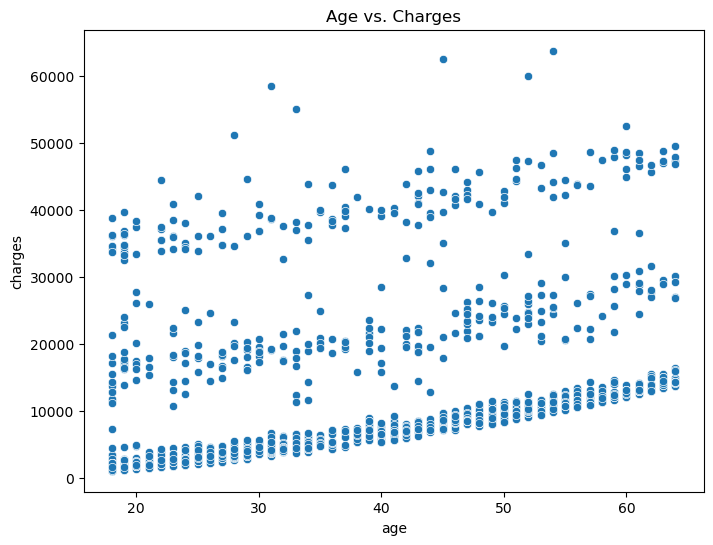

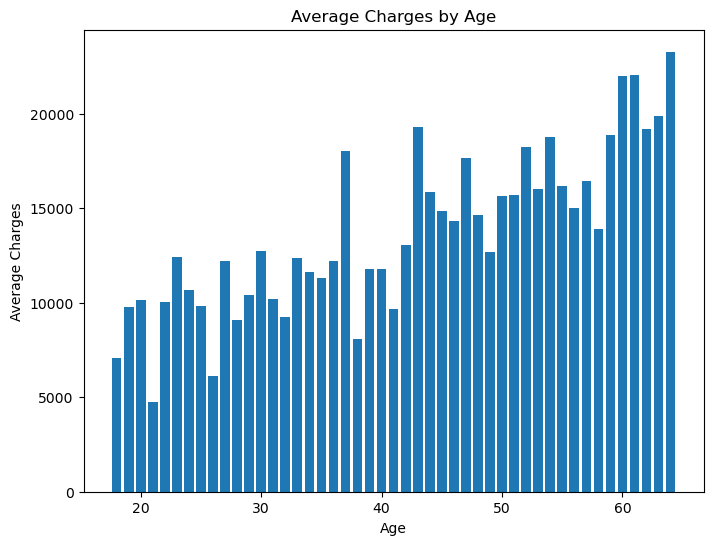

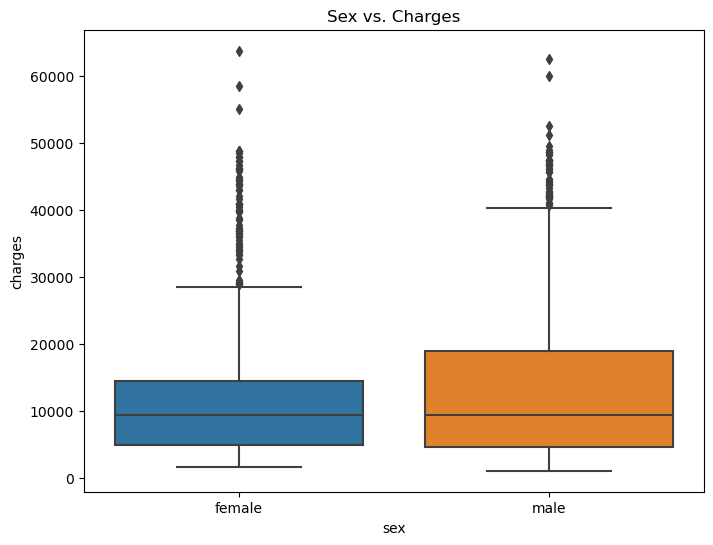

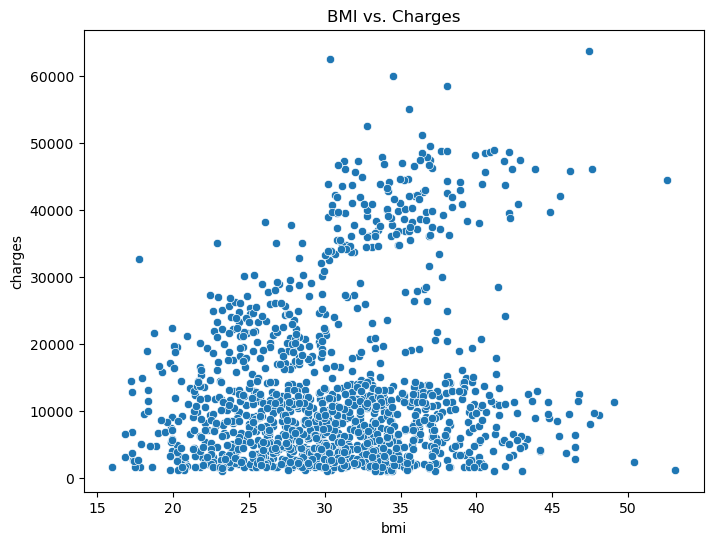

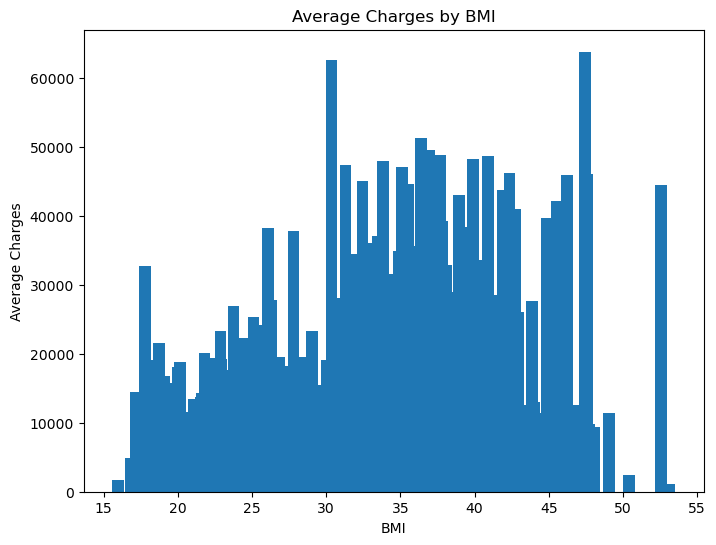

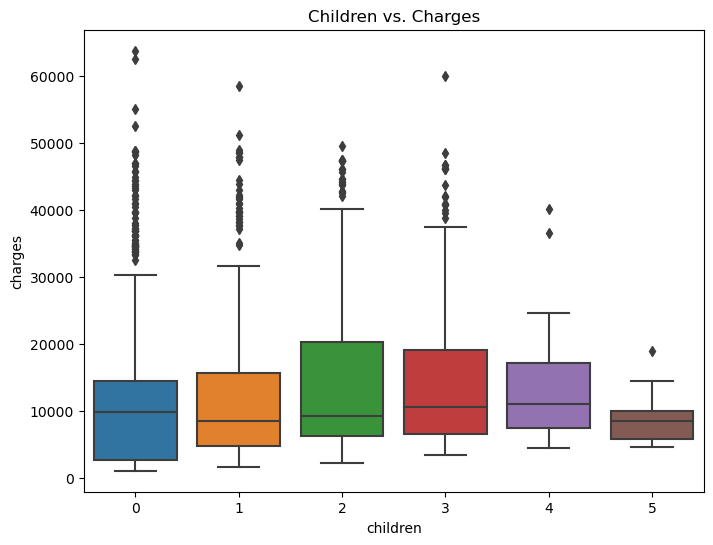

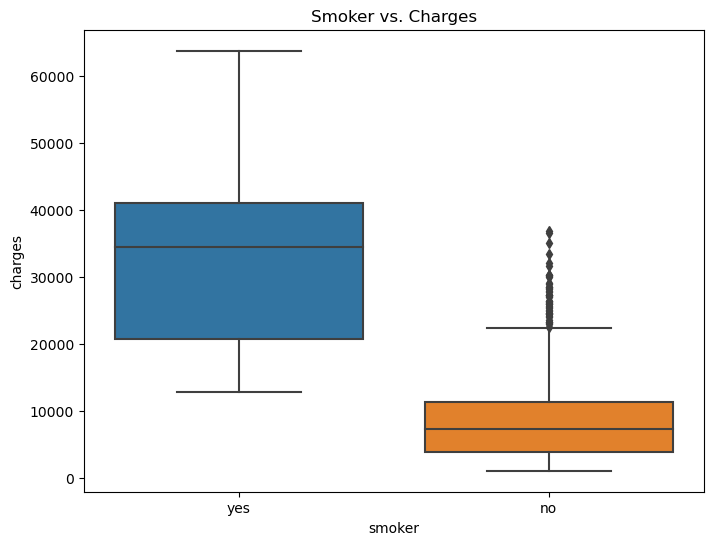

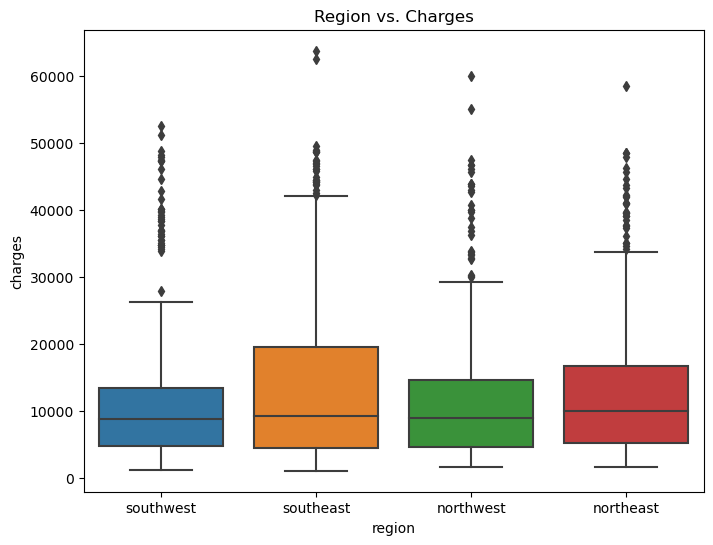

In [10]:
# Plot 'age' vs. 'charges'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs. Charges')
plt.show()

# Group the data by 'age' and calculate the average charges for each age group
age_charges = df.groupby('age')['charges'].mean().reset_index()
# Create a bar graph with age on the x-axis and charges on the y-axis
plt.figure(figsize=(8, 6))
plt.bar(age_charges['age'], age_charges['charges'])
plt.title('Average Charges by Age')
plt.xlabel('Age')
plt.ylabel('Average Charges')

plt.show()

# Plot 'sex' vs. 'charges'
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex vs. Charges')
plt.show()

# Plot 'bmi' vs. 'charges'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs. Charges')
plt.show()

bmi_charges = df.groupby('bmi')['charges'].mean().reset_index()
# Create a bar graph with BMI on the x-axis and charges on the y-axis
plt.figure(figsize=(8, 6))
plt.bar(bmi_charges['bmi'], bmi_charges['charges'])
plt.title('Average Charges by BMI')
plt.xlabel('BMI')
plt.ylabel('Average Charges')

plt.show()

# Plot 'children' vs. 'charges'
plt.figure(figsize=(8, 6))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Children vs. Charges')
plt.show()

# Plot 'smoker' vs. 'charges'
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs. Charges')
plt.show()

# Plot 'region' vs. 'charges'
plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region vs. Charges')
plt.show()

Here, we can see:
1. There is evidently a correlation between age and charges, with 3 distinct buckets of clients
2. Average charge increases with age
3. Being a smoker appreciatevely increases premium charges
3. Charges increase with BMI in one bucket of client, but not with the other. There also seem to be a lot of outliers in this feature. In order to investigate this further, we do a joint plot of the BMI and smoker information. 

### Pair Plots to understand Feature Correlation

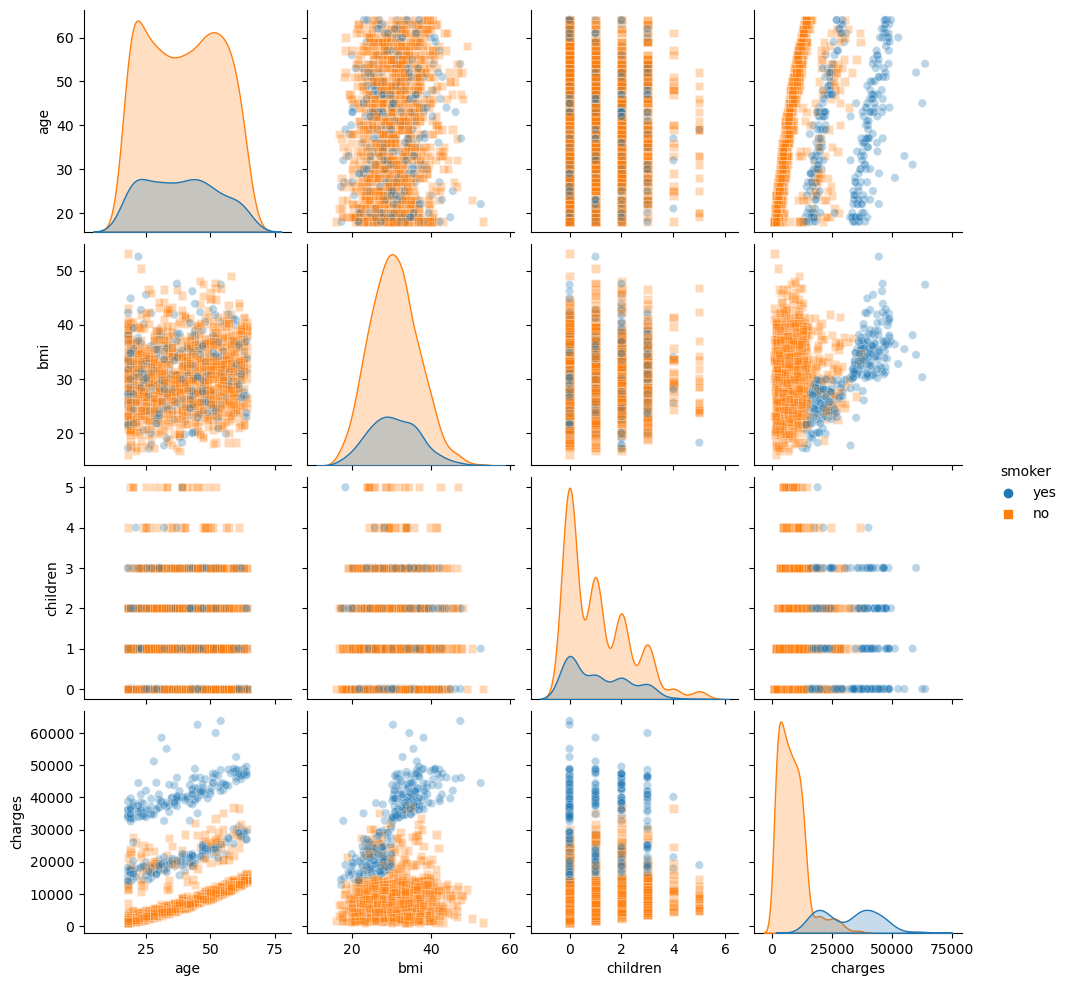

In [11]:
sns.pairplot(df, hue='smoker', markers=["o", "s"], plot_kws={'alpha': 0.3})
plt.show()

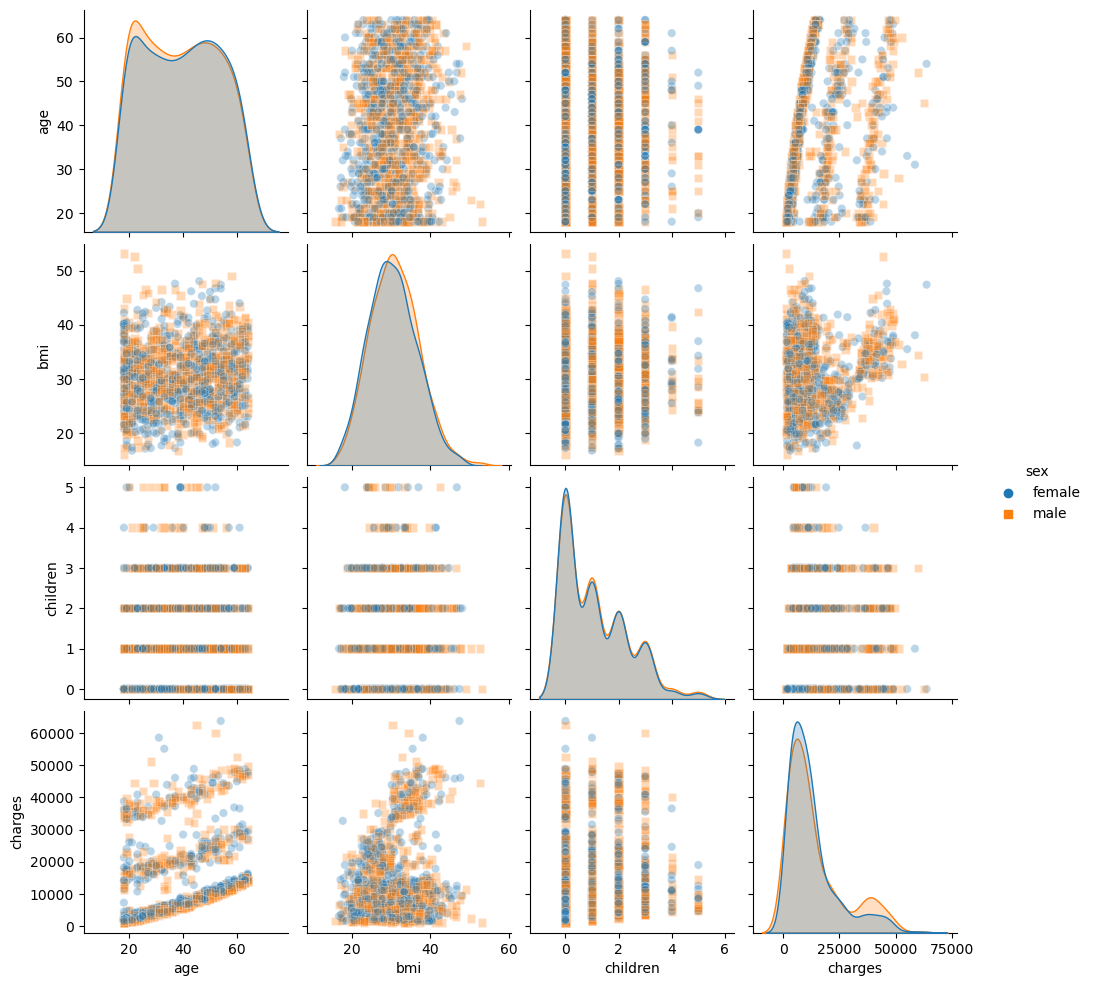

In [12]:
sns.pairplot(df, hue='sex', markers=["o", "s"], plot_kws={'alpha': 0.3})
plt.show()

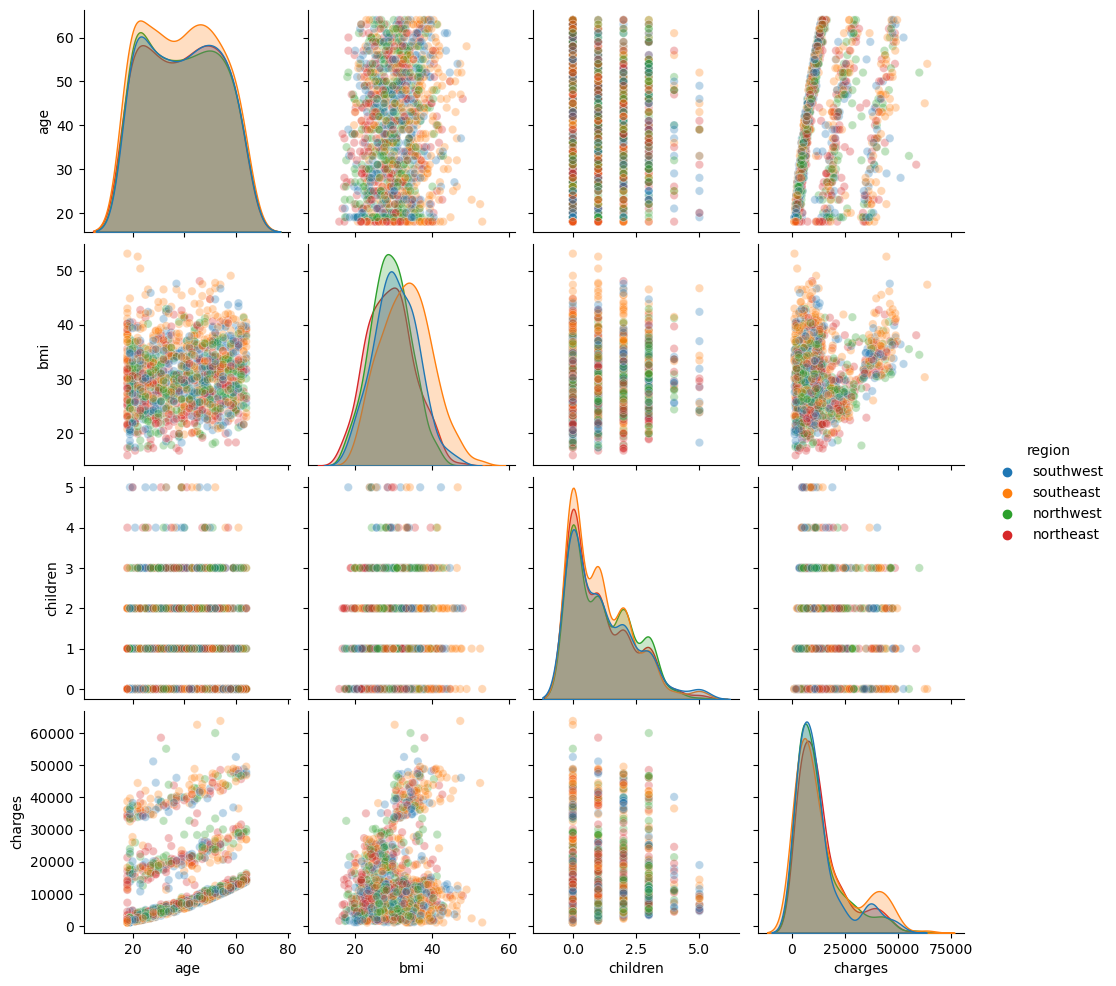

In [13]:
sns.pairplot(df, hue='region', plot_kws={'alpha': 0.3})
plt.show()

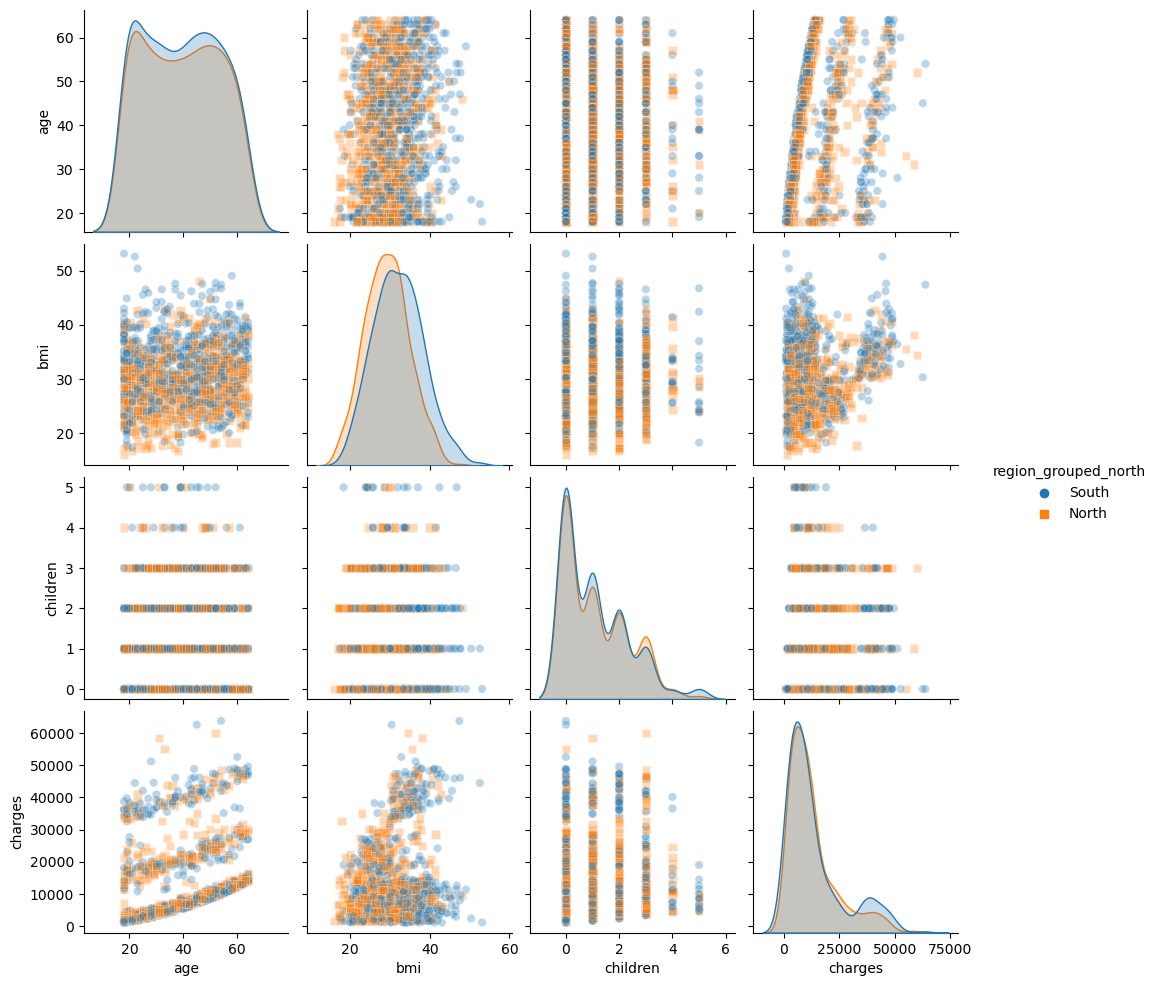

In [14]:
df['region_grouped_north'] = df['region'].apply(lambda x: 'North' if x in ['northeast', 'northwest'] else 'South')

# Create a pairplot with 'region_grouped' as the hue
sns.pairplot(df, hue='region_grouped_north', markers=["o", "s"], plot_kws={'alpha': 0.3})
plt.show()

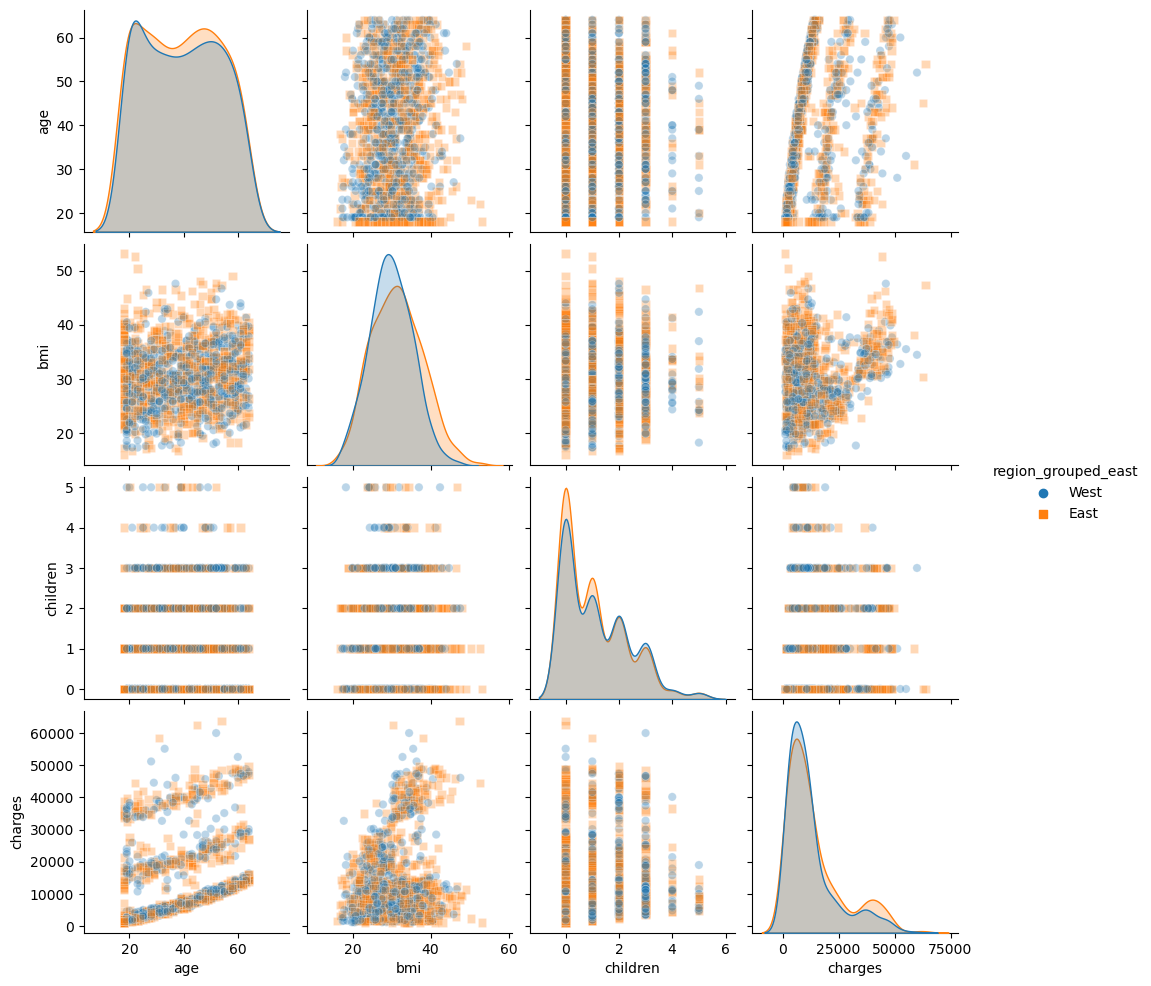

In [15]:
df['region_grouped_east'] = df['region'].apply(lambda x: 'East' if x in ['northeast', 'southeast'] else 'West')

# Create a pairplot with 'region_grouped' as the hue
sns.pairplot(df, hue='region_grouped_east', markers=["o", "s"], plot_kws={'alpha': 0.3})
plt.show()

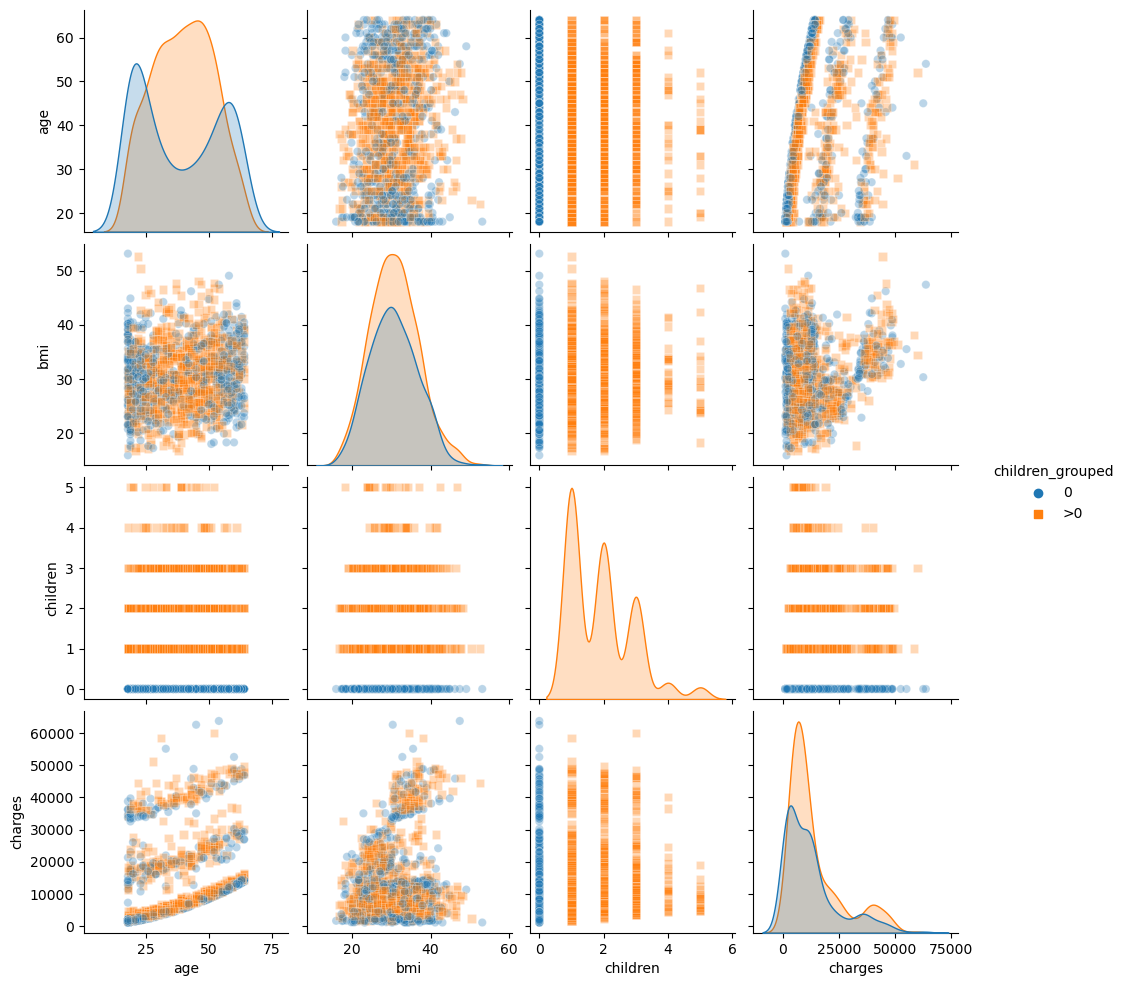

In [16]:
df['children_grouped'] = df['children'].apply(lambda x: '0' if x == 0 else '>0')

# Create a pairplot with 'children_grouped' as the hue
sns.pairplot(df, hue='children_grouped', markers=["o", "s"], plot_kws={'alpha': 0.3})
plt.show()


From these plots, we can see that three variable seem to be related to each other:
1. charges increase with BMI mostly if the clients are smokers too. 
2. charges increase with age with roughly the same rate of increase but the starting point is significantly higher for smokers than for non-smokers

Thus, we can see that it is essential to look at feasible overlaps of features to see their combined influence on charges.We also note that we might have many outliers in our data that needs to be dealt with in the data pre-processing step. 

### Data Distribution for Quick Sanity Checks

The distribution of charges (from YData) does not seem to follow a standard distribution. Hence, we want to look at the distribution for various segments of the client base, such as: age buckets, sex, etc.

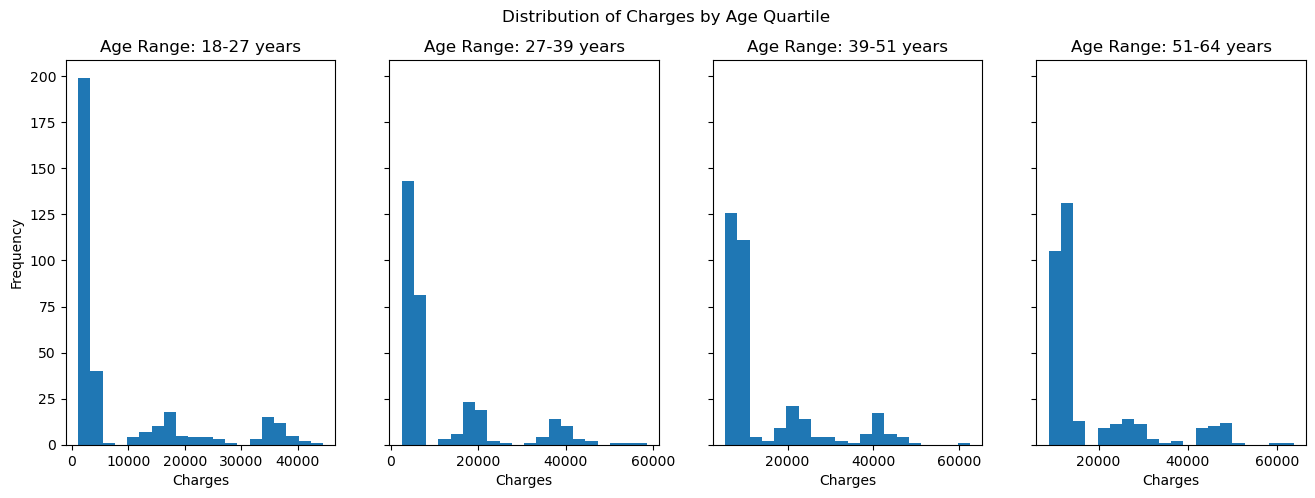

In [17]:
age_quartiles = df['age'].quantile([0, 0.25, 0.5, 0.75, 1.0])

# Create subplots
fig, axes = plt.subplots(1, len(age_quartiles) - 1, figsize=(16, 5), sharey=True)
fig.suptitle('Distribution of Charges by Age Quartile')

# Iterate through age quartiles and plot the distribution of charges
for i in range(len(age_quartiles) - 1):
    ax = axes[i]
    min_age = age_quartiles.iloc[i]
    max_age = age_quartiles.iloc[i + 1]
    age_range_label = f'{min_age:.0f}-{max_age:.0f} years'
    df[(df['age'] >= min_age) & (df['age'] < max_age)]['charges'].plot(kind='hist', ax=ax, bins=20)
    ax.set_title(f'Age Range: {age_range_label}')
    ax.set_xlabel('Charges')
    ax.set_ylabel('Frequency')

plt.show()

However, we still do not see a clear distribution of charges. Therefore, age is not a determining factor.

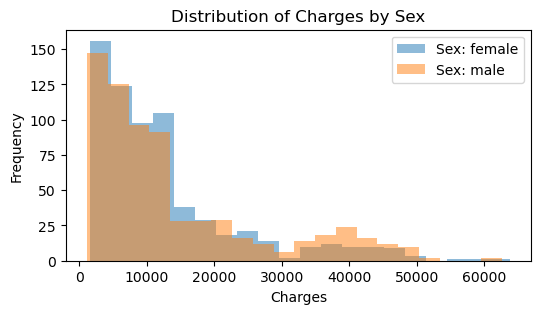

In [18]:
unique_sex = df['sex'].unique()

# Create a single plot for overlapped histograms
plt.figure(figsize=(6, 3))
plt.title('Distribution of Charges by Sex')

# Iterate through 'sex' categories and plot overlapped histograms
for sex_value in unique_sex:
    # Filter data for the current sex
    filtered_data = df[df['sex'] == sex_value]
    
    # Plot the distribution of charges
    filtered_data['charges'].plot(kind='hist', bins=20, alpha=0.5, label=f'Sex: {sex_value}')

plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

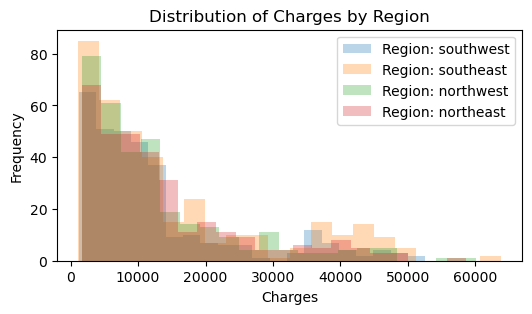

In [19]:
unique_regions = df['region'].unique()

# Create a single plot for overlapped histograms
plt.figure(figsize=(6,3))
plt.title('Distribution of Charges by Region')

# Iterate through 'region' categories and plot overlapped histograms
for region_value in unique_regions:
    # Filter data for the current region
    filtered_data = df[df['region'] == region_value]
    
    # Plot the distribution of charges
    filtered_data['charges'].plot(kind='hist', bins=20, alpha=0.3, label=f'Region: {region_value}')

plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

From the above plots we can see that most variables seem to follow the original distribution of Charges, with peaks at values around: 3000, 20000, and 40000.

# Data Pre-processing and Feature Selection

1. We need to drop the duplicate row
2. We will map the categorical text data to numerics so that we are able to use them as both categories and numerical values. 

In [20]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

### Encodings

In [21]:
label_encoder = LabelEncoder()
#since there are 4 values for region, it is better to do one-hot encoding instead of label encoding
df = pd.get_dummies(df, columns=['region'], prefix='region')
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype == 'bool':
        df[column] = label_encoder.fit_transform(df[column])


In [22]:
X = df.drop(columns=['charges'])
Y = df['charges']

### Outlier Detection

In [23]:
z_scores = (X - X.mean()) / X.std()
z_scores

age    sex    bmi  children  smoker  region_grouped_north  \
0    -1.440 -1.009 -0.453    -0.909   1.969                 0.969   
1    -1.511  0.990  0.509    -0.079  -0.508                 0.969   
2    -0.799  0.990  0.383     1.580  -0.508                 0.969   
3    -0.443  0.990 -1.305    -0.909  -0.508                -1.031   
4    -0.514  0.990 -0.292    -0.909  -0.508                -1.031   
...     ...    ...    ...       ...     ...                   ...   
1332  0.767  0.990  0.050     1.580  -0.508                -1.031   
1333 -1.511 -1.009  0.206    -0.909  -0.508                -1.031   
1334 -1.511 -1.009  1.014    -0.909  -0.508                 0.969   
1335 -1.297 -1.009 -0.797    -0.909  -0.508                 0.969   
1336  1.551 -1.009 -0.261    -0.909   1.969                -1.031   

      region_grouped_east  children_grouped  region_northeast  \
0                   1.029            -1.154            -0.565   
1                  -0.971             0.866            -0.565   
2                  -0.971             0.866            -0.565   
3                   1.029            -1.154            -0.565   
4                   1.029            -1.154            -0.565   
...                   ...               ...               ...   
1332                1.029             0.866            -0.565   
1333               -0.971            -1.154             1.768   
1334               -0.971            -1.154            -0.565   
1335                1.029            -1.154            -0.565   
1336                1.029            -1.154            -0.565   

      region_northwest  region_southeast  region_southwest  
0               -0.565            -0.611             1.764  
1               -0.565             1.634            -0.566  
2               -0.565             1.634            -0.566  
3                1.768            -0.611            -0.566  
4                1.768            -0.611            -0.566  
...                ...               ...               ...  
1332             1.768            -0.611            -0.566  
1333            -0.565            -0.611            -0.566  
1334            -0.565             1.634            -0.566  
1335            -0.565            -0.611             1.764  
1336             1.768            -0.611            -0.566  

[1337 rows x 12 columns]

In [24]:
#looking for rows where any of the feature values are more than 3 standard deviations away for that feature.
rows_with_outliers = df[z_scores.gt(3).any(axis=1)]
rows_with_outliers

age  sex     bmi  children  smoker    charges  region_grouped_north  \
32     19    0  28.600         5       0   4687.797                     1   
71     31    1  28.500         5       0   6799.458                     0   
116    58    1  49.060         0       0  11381.325                     1   
166    20    0  37.000         5       0   4830.630                     1   
413    25    1  23.900         5       0   5080.096                     1   
425    45    1  24.310         5       0   9788.866                     1   
438    52    0  46.750         5       0  12592.534                     1   
568    49    0  31.900         5       0  11552.904                     1   
639    33    1  42.400         5       0   6666.243                     1   
846    23    1  50.380         1       0   2438.055                     1   
876    33    1  33.440         5       0   6653.789                     1   
931    46    1  25.800         5       0  10096.970                     1   
936    39    0  24.225         5       0   8965.796                     0   
968    39    0  34.320         5       0   8596.828                     1   
983    20    1  30.115         5       0   4915.060                     0   
1046   22    1  52.580         1       1  44501.398                     1   
1084   39    0  18.300         5       1  19023.260                     1   
1115   41    1  29.640         5       0   9222.403                     0   
1129   39    0  23.870         5       0   8582.302                     1   
1244   28    1  24.300         5       0   5615.369                     1   
1271   43    1  25.520         5       0  14478.330                     1   
1316   18    1  53.130         0       0   1163.463                     1   

      region_grouped_east  children_grouped  region_northeast  \
32                      1                 1                 0   
71                      0                 1                 1   
116                     0                 0                 0   
166                     1                 1                 0   
413                     1                 1                 0   
425                     0                 1                 0   
438                     0                 1                 0   
568                     1                 1                 0   
639                     1                 1                 0   
846                     0                 1                 0   
876                     0                 1                 0   
931                     1                 1                 0   
936                     1                 1                 0   
968                     0                 1                 0   
983                     0                 1                 1   
1046                    0                 1                 0   
1084                    1                 1                 0   
1115                    0                 1                 1   
1129                    0                 1                 0   
1244                    1                 1                 0   
1271                    0                 1                 0   
1316                    0                 0                 0   

      region_northwest  region_southeast  region_southwest  
32                   0                 0                 1  
71                   0                 0                 0  
116                  0                 1                 0  
166                  0                 0                 1  
413                  0                 0                 1  
425                  0                 1                 0  
438                  0                 1                 0  
568                  0                 0                 1  
639                  0                 0                 1  
846                  0                 1                 0  
876                  0                 1                 0  
931   

A (client,feature) pair with a particular value is considered to be an outlier typically only if the value is 3 standard deviations away from the mean of that data in that dataset. Here, we want to check how many outliers we have per feature. 

In [25]:
outliers_per_feature = (z_scores > 3).sum()
outliers_per_feature

age                      0
sex                      0
bmi                      4
children                18
smoker                   0
region_grouped_north     0
region_grouped_east      0
children_grouped         0
region_northeast         0
region_northwest         0
region_southeast         0
region_southwest         0
dtype: int64

In [26]:
#Number of clients that have 5 children
df['children'].value_counts()[5]

18

In [27]:
rows_with_bmi_outliers = df[np.abs(z_scores['bmi'])>3]
rows_with_bmi_outliers

age  sex    bmi  children  smoker    charges  region_grouped_north  \
116    58    1  49.06         0       0  11381.325                     1   
846    23    1  50.38         1       0   2438.055                     1   
1046   22    1  52.58         1       1  44501.398                     1   
1316   18    1  53.13         0       0   1163.463                     1   

      region_grouped_east  children_grouped  region_northeast  \
116                     0                 0                 0   
846                     0                 1                 0   
1046                    0                 1                 0   
1316                    0                 0                 0   

      region_northwest  region_southeast  region_southwest  
116                  0                 1                 0  
846                  0                 1                 0  
1046                 0                 1                 0  
1316                 0                 1                 0

Our z-score test detected two outliers for two features: BMI and Number of Children. The following conclusions are made:
1. Because of the distribution of data, clients with 5 children are underrepresented and thus seem to be more than 3 standard deviations away. However, since this is an entire segment of clients, we cannot remove them. 
2. The BMI values for 4 cases are abnormally high (not low) and these can be treated as outliers. However, these rows probably add value to the model since we can see that certain cases of high BMI indicate high charges. Thus, whether or not these should be removed will be determined after checking model performance on validation set. 

### Univariate Feature Selection

Now, we want to look at the effect that a single feature has on the premium charge, irrespective of any other feature.

In [28]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score')  #print 10 best features

Feature     Score
4                smoker  2175.737
0                   age   130.403
2                   bmi    54.703
10     region_southeast     7.267
6   region_grouped_east     6.693
3              children     6.090
7      children_grouped     5.488
1                   sex     4.513
11     region_southwest     2.547
9      region_northwest     2.002

As expected (from EDA), features age, BMI, and smoker seem to have the biggest influence on premium charges.

### Multivariate Feature Selection

Next, we use mutual information regression as the scoring function to evaluate the influence of pairs of features on the target variable.

In [29]:
k = 5  # You can adjust 'k' based on your needs

# Create a feature selector using mutual information regression
selector = SelectKBest(score_func=mutual_info_regression, k=k)

selector.fit(X, Y)

selected_indices = selector.get_support(indices=True)

# Get the feature names of the selected feature pairs
selected_feature_names = X.columns[selected_indices]

# Get the mutual information scores for all possible feature pairs
combinations_of_features = list(combinations(X.columns, 2))
feature_scores = []

for feature_pair in combinations_of_features:
    indices = [X.columns.get_loc(feature) for feature in feature_pair]
    scores = mutual_info_regression(X.iloc[:, indices], Y)
    # Take the maximum mutual information score for the feature pair
    max_score = max(scores)
    feature_scores.append((feature_pair, max_score))

feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)

print("\nTop Feature Pairs by Mutual Information:")
for feature_pair, score in feature_scores:
    print(f"Feature Pair: {feature_pair}, Max Mutual Information Score: {score:.3f}")


Top Feature Pairs by Mutual Information:
Feature Pair: ('age', 'bmi'), Max Mutual Information Score: 1.502
Feature Pair: ('age', 'children_grouped'), Max Mutual Information Score: 0.829
Feature Pair: ('age', 'smoker'), Max Mutual Information Score: 0.829
Feature Pair: ('age', 'region_grouped_east'), Max Mutual Information Score: 0.829
Feature Pair: ('age', 'region_southeast'), Max Mutual Information Score: 0.829
Feature Pair: ('age', 'sex'), Max Mutual Information Score: 0.829
Feature Pair: ('age', 'region_grouped_north'), Max Mutual Information Score: 0.829
Feature Pair: ('age', 'region_southwest'), Max Mutual Information Score: 0.829
Feature Pair: ('age', 'children'), Max Mutual Information Score: 0.828
Feature Pair: ('age', 'region_northeast'), Max Mutual Information Score: 0.828
Feature Pair: ('age', 'region_northwest'), Max Mutual Information Score: 0.828
Feature Pair: ('sex', 'smoker'), Max Mutual Information Score: 0.369
Feature Pair: ('bmi', 'smoker'), Max Mutual Information S

Thus, certain pairs of features seem to influence charges more than others. The following conclusions are made:
1. Certain features which had very low scores in the univariate analysis become important once paired with other features (for example: region v/s age-region). Thus, we can perform feature engineering to replace these 2 features and a single, combined feature, for the purposes of dimensionality reduction. 
2. However, the features being dropped could also be paired strongly with other features. Thus, we need to experiment with a few features. 
<!-- 3. Region-related features are quite intertwined. We can combine the 'east' and 'west' features since the southness or northness of the client does not seem to be making a big difference.  -->

### Feature Engineering

In the EDA step, we made the following observations:
1. charges increase with BMI mostly if the clients are smokers too. 
2. charges increase with age with roughly the same rate of increase but the starting point is significantly higher for smokers than for non-smokers

Thus, we will engineer a few features to capture these relations. 

In [30]:
X['bmi_smoke'] = np.where(X['smoker'] == 1, X['bmi'], np.log(X['bmi']))
X['age_smoke'] = np.where(X['smoker'] == 1, (X['age']+X['age'].mean()) , X['age'])
X

age  sex     bmi  children  smoker  region_grouped_north  \
0      19    0  27.900         0       1                     1   
1      18    1  33.770         1       0                     1   
2      28    1  33.000         3       0                     1   
3      33    1  22.705         0       0                     0   
4      32    1  28.880         0       0                     0   
...   ...  ...     ...       ...     ...                   ...   
1332   50    1  30.970         3       0                     0   
1333   18    0  31.920         0       0                     0   
1334   18    0  36.850         0       0                     1   
1335   21    0  25.800         0       0                     1   
1336   61    0  29.070         0       1                     0   

      region_grouped_east  children_grouped  region_northeast  \
0                       1                 0                 0   
1                       0                 1                 0   
2                       0                 1                 0   
3                       1                 0                 0   
4                       1                 0                 0   
...                   ...               ...               ...   
1332                    1                 1                 0   
1333                    0                 0                 1   
1334                    0                 0                 0   
1335                    1                 0                 0   
1336                    1                 0                 0   

      region_northwest  region_southeast  region_southwest  bmi_smoke  \
0                    0                 0                 1     27.900   
1                    0                 1                 0      3.520   
2                    0                 1                 0      3.497   
3                    1                 0                 0      3.123   
4                    1                 0                 0      3.363   
...                ...               ...               ...        ...   
1332                 1                 0                 0      3.433   
1333                 0                 0                 0      3.463   
1334                 0                 1                 0      3.607   
1335                 0                 0                 1      3.250   
1336                 1                 0                 0     29.070   

      age_smoke  
0        58.222  
1        18.000  
2        28.000  
3        33.000  
4        32.000  
...         ...  
1332     50.000  
1333     18.000  
1334     18.000  
1335     21.000  
1336    100.222  

[1337 rows x 14 columns]

The values of the engineered features were chosen by logic. I wanted to combine the effects of BMI and smoke in a way that if a for a given BMI range, a non-smoker has much less premium charge than a smoker. Simply multiplying the two features was not optimal since a lot of information would have been lost on muliplication of BMI with a 'non-smoker'=0 value. Instead, the BMI for a non-smoker was "decreased" by taking log. Similarly, for combining age and smoker data, the age of a smoker was increased by an arbitrary value, in this case the mean of the data. 

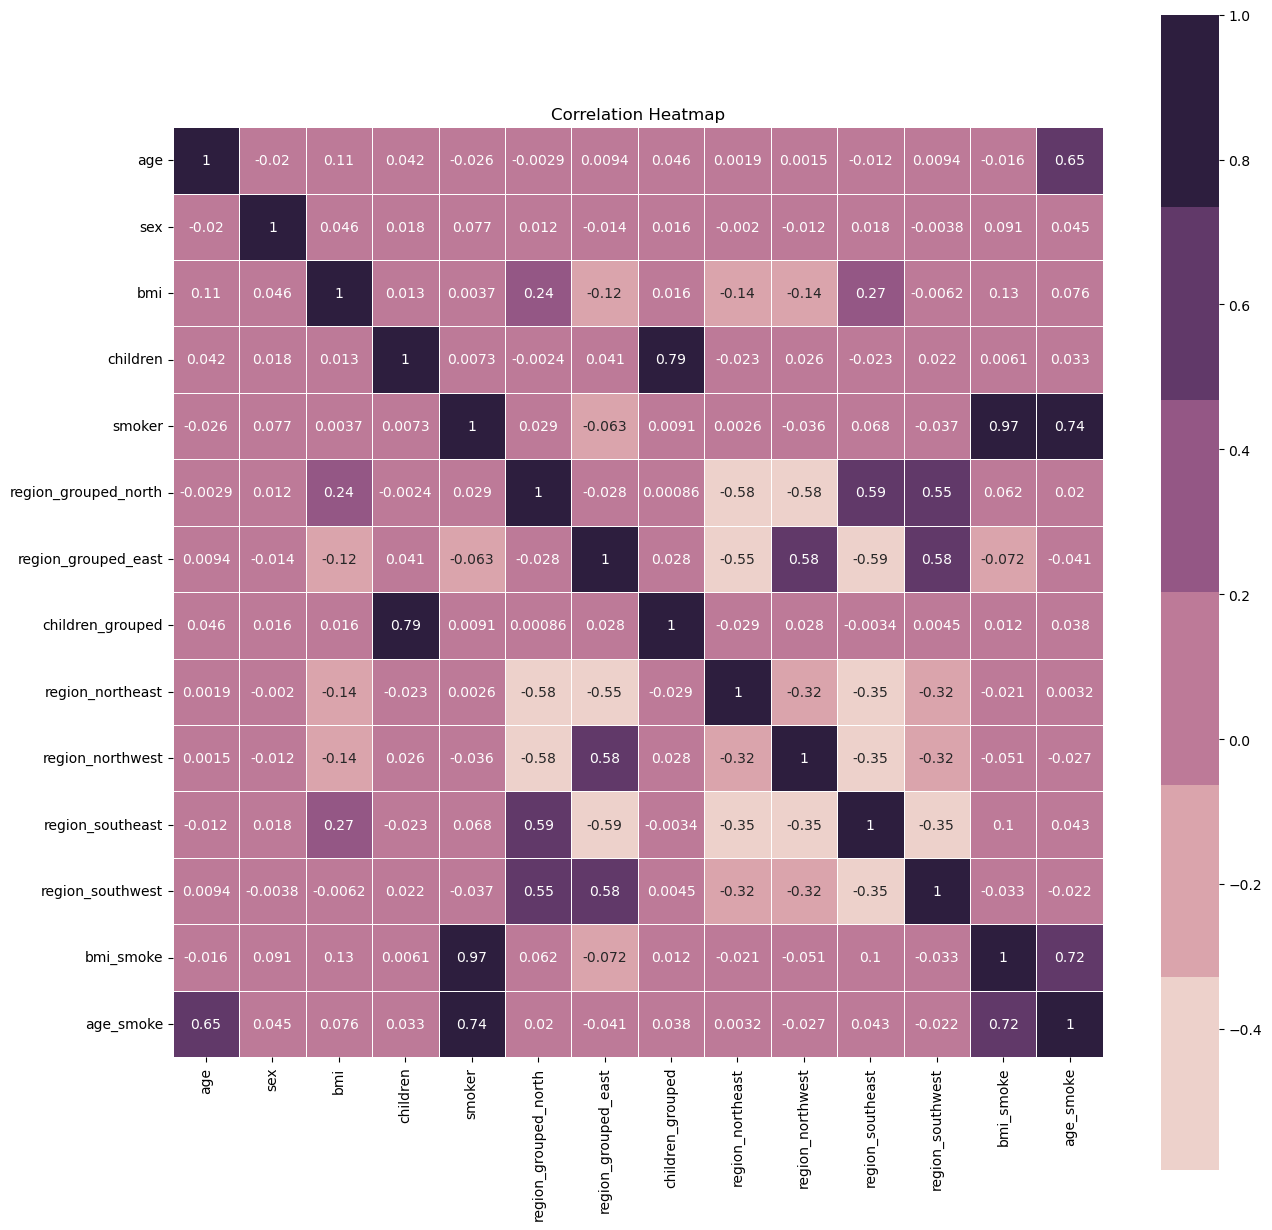

In [31]:
correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, square=True,cmap=sns.cubehelix_palette(as_cmap=False))
plt.title("Correlation Heatmap")
plt.show()

Now, we create two samples of the X data such that for each sample, the multicolinearity issue does not exist. It is done in the following way:

In [32]:
X_less = X.drop(
    columns=['bmi','smoker','children','region_northeast','region_northwest','region_southeast','region_southwest','age'])
X_less.shape

(1337, 6)

In [33]:
X_original = X.drop(
    columns=['region_grouped_north','region_grouped_east','children_grouped','bmi_smoke','age_smoke'])
X_original.shape

(1337, 9)

Now, we will test our models with two different datasets: 
1. the dataset with more, original (unegineered) features
2. the dataset with lesser, engineered features

# Model Building

### Training and Test Split:

In [34]:
Y_scaled, lam = boxcox(Y)
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X_original, Y_scaled, test_size=validation_size, random_state=seed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [35]:
# test options for regression
num_folds = 10
scoring = 'neg_mean_squared_error'

I decided to scale our target variable using the box-cox transformation since it automatically determines the best power parameter to stabilize variance and bring the data closer to a normal distribution.

### Defining different models and Validation Metrics:

In [36]:
# spot check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#Neural Network
models.append(('MLP', MLPRegressor()))

In [37]:
kfold_results = []
names = []
validation_results = []
train_results = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    names.append(name)

    # Finally we Train on the full period and test against validation
    res = model.fit(X_train_scaled, Y_train)
    validation_result = np.mean(np.square(res.predict(X_validation_scaled) - Y_validation))
    validation_results.append(validation_result)
    train_result = np.mean(np.square(res.predict(X_train_scaled) - Y_train))
    train_results.append(train_result)
    
    msg = "%s: \nAverage CV error: %s \nStd CV Error: (%s) \nTraining Error:\n%s \nTest Error:\n%s" % \
    (name, str(cv_results.mean()), str(cv_results.std()), str(train_result), str(validation_result))
    print(msg)
    print('----------')

LR: 
Average CV error: 0.42230354234616774 
Std CV Error: (0.058125154284842856) 
Training Error:
0.4158124308164883 
Test Error:
0.4702316548167326
----------
LASSO: 
Average CV error: 1.8386126490196184 
Std CV Error: (0.197943896107004) 
Training Error:
1.8371636685438268 
Test Error:
1.94471175397996
----------
EN: 
Average CV error: 1.2381414406737759 
Std CV Error: (0.14785152644668337) 
Training Error:
1.2344670316438067 
Test Error:
1.318753626792244
----------
KNN: 
Average CV error: 0.37636174436861114 
Std CV Error: (0.06255332986840054) 
Training Error:
0.2467641470517615 
Test Error:
0.4488231328241489
----------
CART: 
Average CV error: 0.5856786330723709 
Std CV Error: (0.12433254597329098) 
Training Error:
0.009768832837591519 
Test Error:
0.6631365559682384
----------


/Users/saakshimore/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saakshimore/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saakshimore/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saakshimore/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/s

MLP: 
Average CV error: 0.45304407224406457 
Std CV Error: (0.07916797149922992) 
Training Error:
0.3643692660065439 
Test Error:
0.4707837513310388
----------


/Users/saakshimore/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


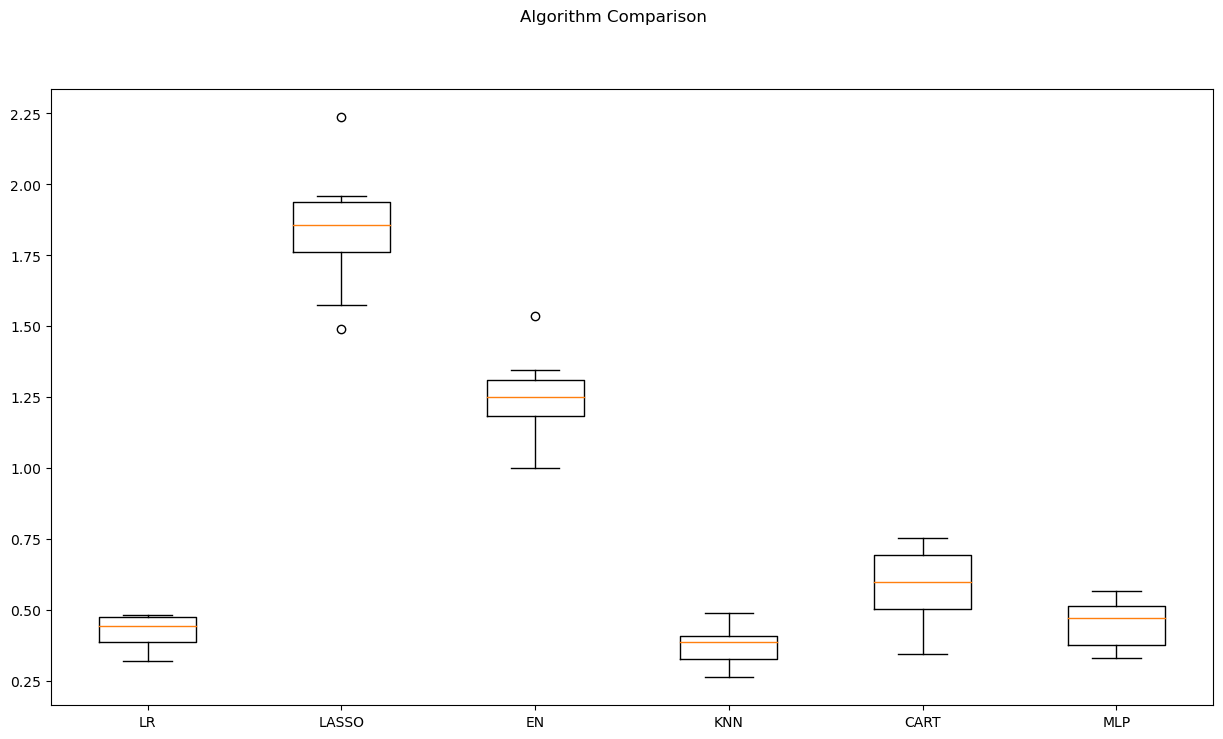

In [38]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

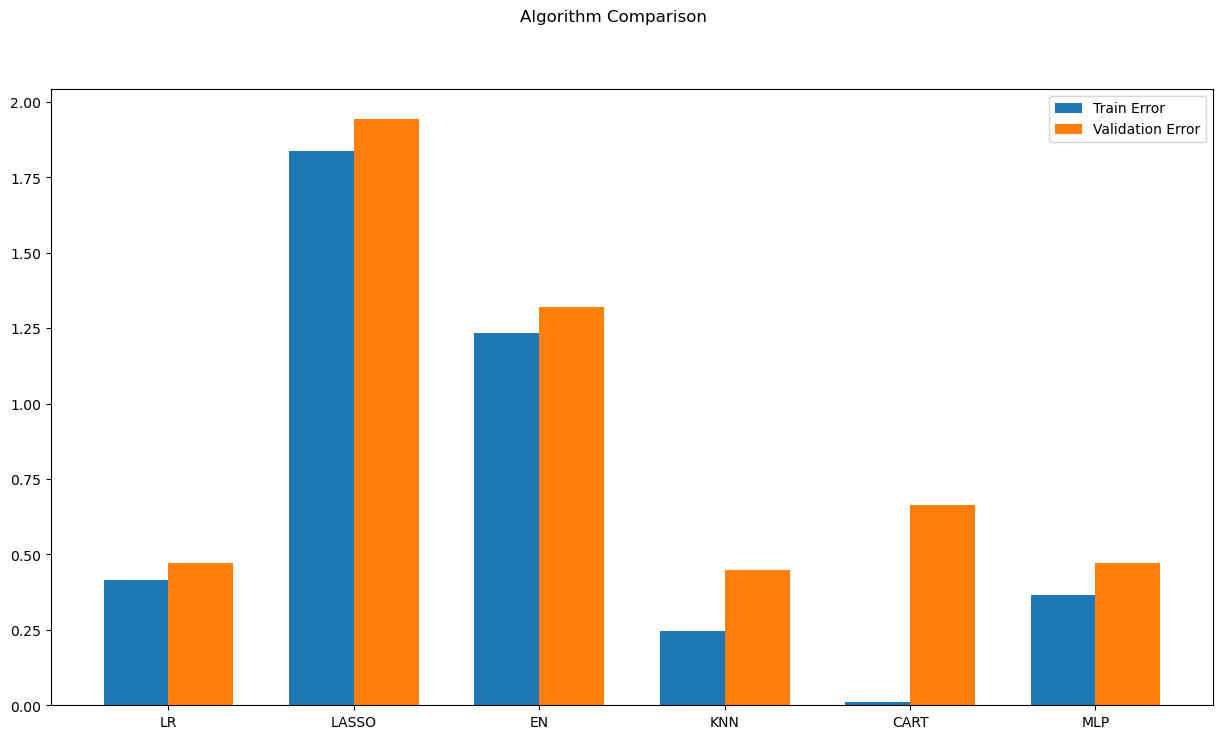

In [39]:
# compare algorithms
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, [x.mean() for x in train_results],  width=width, label='Train Error')
plt.bar(ind + width/2, [x.mean() for x in validation_results], width=width, label='Validation Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

Since we are looking at average errors, the range of value itself can differ depending on the nature of the target variable. To scale it, we took the square root of our target variable. From here we can see that our test error is least for the KNN. Thus, this is the model that we will continue with. However, before proceeding, we will run this pipeline for the other X dataset that we built, which has more of the engineered features. The error values will help us understand if X_less is better than X_original. 

### Running on the X Dataset that has more engineered features

In [40]:
Y_scaled, lam = boxcox(Y)
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X_less, Y_scaled, test_size=validation_size, random_state=seed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
# test options for regression
num_folds = 10
scoring = 'neg_mean_squared_error'
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#Neural Network
models.append(('MLP', MLPRegressor()))
kfold_results = []
names = []
validation_results = []
train_results = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train_scaled, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    names.append(name)

    # Finally we Train on the full period and test against validation
    res = model.fit(X_train_scaled, Y_train)
    validation_result = np.mean(np.square(res.predict(X_validation_scaled) - Y_validation))
    validation_results.append(validation_result)
    train_result = np.mean(np.square(res.predict(X_train_scaled) - Y_train))
    train_results.append(train_result)
    
    msg = "%s: \nAverage CV error: %s \nStd CV Error: (%s) \nTraining Error:\n%s \nTest Error:\n%s" % \
    (name, str(cv_results.mean()), str(cv_results.std()), str(train_result), str(validation_result))
    print(msg)
    print('----------')

LR: 
Average CV error: 0.42498811264202674 
Std CV Error: (0.058341636641016076) 
Training Error:
0.42059996140004496 
Test Error:
0.4645201398888439
----------
LASSO: 
Average CV error: 1.4815226948792857 
Std CV Error: (0.18345003526458373) 
Training Error:
1.4771575786575655 
Test Error:
1.566755361086855
----------
EN: 
Average CV error: 0.9483422956964394 
Std CV Error: (0.11406554126635551) 
Training Error:
0.9452870052474281 
Test Error:
1.0083199875123978
----------
KNN: 
Average CV error: 0.36732699238144195 
Std CV Error: (0.069909135002308) 
Training Error:
0.2380502061736067 
Test Error:
0.4481444713013448
----------
CART: 
Average CV error: 0.5749198749788774 
Std CV Error: (0.1692640343229266) 
Training Error:
0.010687055526247982 
Test Error:
0.6765158246783706
----------


/Users/saakshimore/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saakshimore/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saakshimore/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saakshimore/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/s

MLP: 
Average CV error: 0.4916515629965329 
Std CV Error: (0.08407042514633382) 
Training Error:
0.3921376949379189 
Test Error:
0.5127738348399736
----------


/Users/saakshimore/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


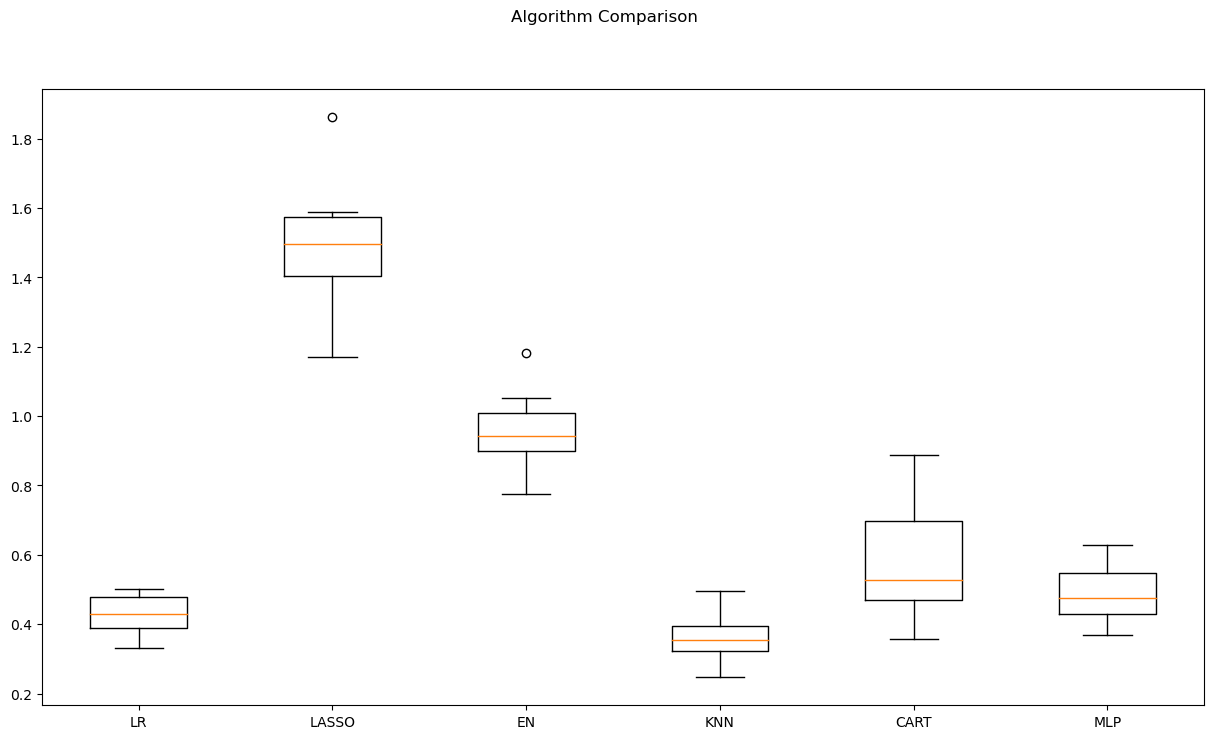

In [41]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

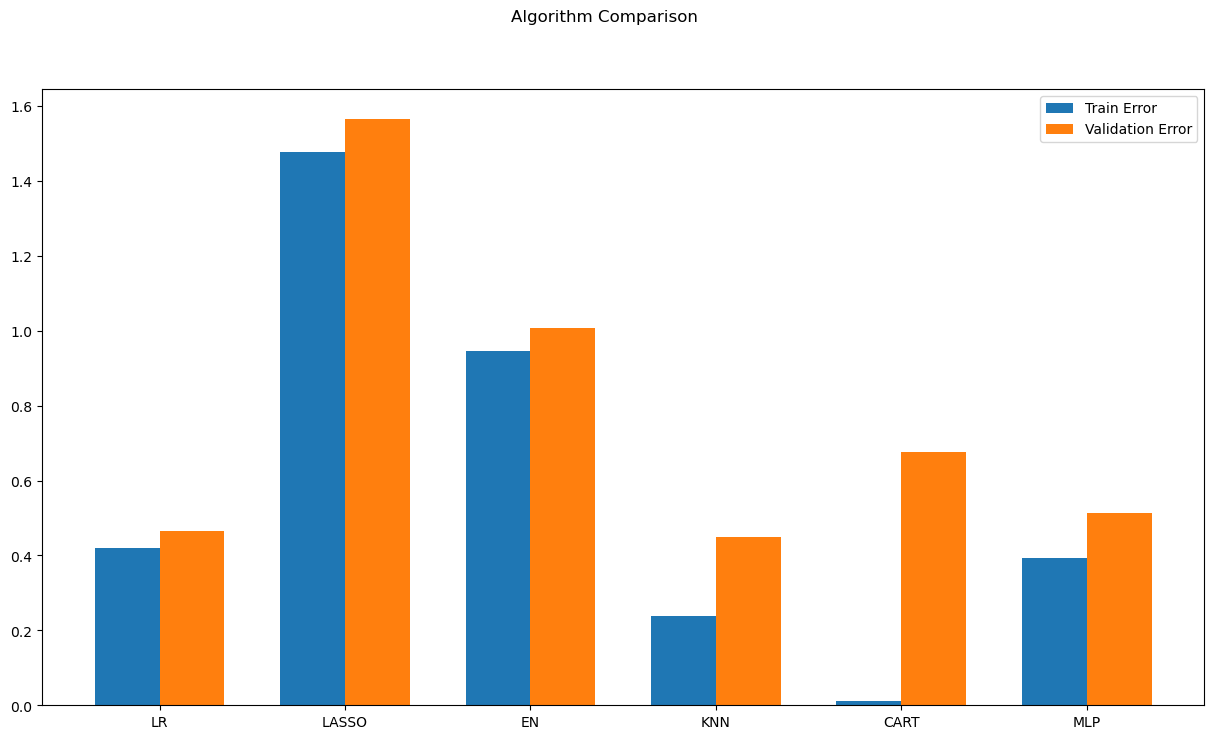

In [42]:
# compare algorithms
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, [x.mean() for x in train_results],  width=width, label='Train Error')
plt.bar(ind + width/2, [x.mean() for x in validation_results], width=width, label='Validation Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

We can see that while CART has an unusually low training error, it's validation error is relatively high, indicating the model's tendency to overfit. The result aligns with our result for X_original in that KNN performed best. We will proceed with usign X_less since it has reduced dimensionality. 

# Model Tuning and Grid Search

The variables in the following code correspond to X_less, which is the dataset that has the engineered features. 

In [44]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn = KNeighborsRegressor()

num_folds = 5 #number of cross-validation folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

# Perform grid search with k-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, Y_train)

# Get the best KNN model and best hyperparameters
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model using cross-validation
cv_scores = -1 * cross_val_score(best_knn, X_train_scaled, Y_train, cv=kf, scoring='neg_mean_squared_error')

# Print the best hyperparameters and CV scores
print("Best Hyperparameters:", best_params)
print("Cross-Validation Scores:")
for fold, score in enumerate(cv_scores):
    print(f"Fold {fold + 1}: {score:.3f}")
print("Average CV Score:", cv_scores.mean())


Best Hyperparameters: {'n_neighbors': 7}
Cross-Validation Scores:
Fold 1: 0.427
Fold 2: 0.387
Fold 3: 0.332
Fold 4: 0.380
Fold 5: 0.296
Average CV Score: 0.3645044764048281


## Finalize the Model

In [49]:
best_knn_model = KNeighborsRegressor(n_neighbors=7)

# Fit the model to the training data
best_knn_model.fit(X_train_scaled, Y_train)
y_pred = best_knn_model.predict(X_validation_scaled)

# Evaluate the model
mse = mean_squared_error(Y_validation, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_validation, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R-squared: {r2:.3f}")

Mean Squared Error: 0.442
Root Mean Squared Error: 0.665
R-squared: 0.773


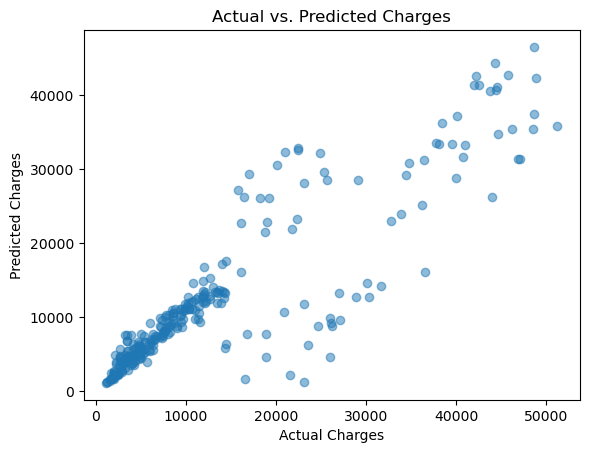

In [58]:
actual_values = inv_boxcox(Y_validation,lam)
predicted_values = inv_boxcox(y_pred,lam)

# Create a scatter plot to visualize the actual vs. predicted charges
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

After inverting the tranformation effect, we can see that most values with lesser premium charge was accurately predicted. However, for greater premium charges, the value was typically under or overestimated by the model. 

## Final comparison between KNN and Linear Regressor

In [54]:
# prepare model
model_2 = LinearRegression()
model_2.fit(X_train_scaled, Y_train)
predictions_2 = model_2.predict(X_validation)

mse_OLS = mean_squared_error(Y_validation, predictions_2)
r2_OLS = r2_score(Y_validation, predictions_2)
print("MSE Regression = %f, MSE KNN = %f" % (mse_OLS, mse ))
print("R2 Regression = %f, R2 KNN = %f" % (r2_OLS, r2 ))


MSE Regression = 2802.365369, MSE KNN = 0.441581
R2 Regression = -1440.752977, R2 KNN = 0.772816


/Users/saakshimore/miniconda3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
Thus, we can see that the KNN performed much better. 

# Residual Analysis

From the plot above, we can see that we had quite a few cases in which the model severly underestimated the premium charges. We will investigate this issue deeper in this section. 

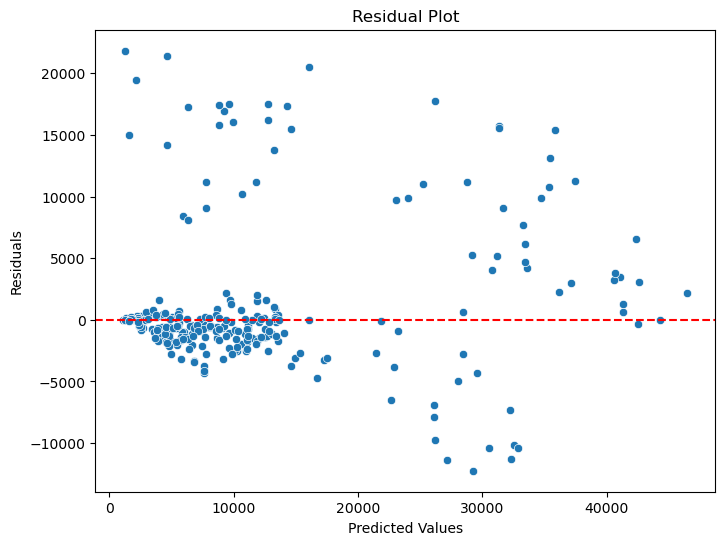

In [57]:

residuals = actual_values - predicted_values

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Thus, we can see that our KNN model performed well for most values with target charge less than 15000. However, the underrepresentation of data for charges > 15000, as can be seen in the yData profile, led to the model not being able to fit well on that part of the dataset. 

To improve this, we can do the following:
1. Removal of outliers
2. Data augmentation to increase distribution of cases for the latter segment. 
3. A deeper understanding of the mispredicted data points (how different were the features for this set of data points compared to the correctly predicted ones)

Thus, the KNN model performed decently well for a certain class of data but the model has a big scope for improvement. 